**Nama** : Ghazi Taqiyya Al Anshari

# Import Package

In [1]:
from os import walk
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# List Filename

In [2]:
DIR = "instrumen"
for (dirpath, dirnames, filenames) in walk(DIR):
    file_audio = filenames

In [3]:
print(file_audio)

['mixkit-drum-roll-566.wav', 'mixkit-guitar-stroke-down-slow-2339.wav', 'mixkit-guitar-stroke-up-slow-2338.wav', 'mixkit-mythical-violin-jingle-2281.wav', 'mixkit-nylon-guitar-single-note-2332.wav', 'mixkit-orchestral-violin-jingle-2280.wav', 'mixkit-orchestral-violin-treble-note-2279.wav', 'mixkit-tribal-drumming-ambience-572.wav', 'mixkit-tribal-ritual-drums-567.wav']


# Load Audio Feature

In [4]:
base_path = 'instrumen/'

In [6]:
audio_data = {
    'y' : [], # data sinyal
    'sr' : [], # data sample rate
    'label' : [] # data label audio
}

In [7]:
for file in file_audio:
    y, sr = librosa.load(base_path + file) # Extract data sinyal dan sample rate audio
    # Memberikan label pada data
    if 'drum' in file:
        label = 'drum'
    elif 'violin' in file:
        label = 'violin'
    elif 'guitar' in file:
        label = 'guitar'
    # Menambah data pada dict audio_data
    audio_data['y'].append(y)
    audio_data['sr'].append(sr)
    audio_data['label'].append(label)


In [8]:
# Data Audio Feature
pd.DataFrame(audio_data)

,y,sr,label
0,"[-1.7564032e-07, 1.0904744e-06, 1.6050259e-06,...",22050,drum
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,guitar
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,guitar
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,violin
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,guitar
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,violin
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,violin
7,"[0.0004669924, 0.00086341414, 0.00055028085, 0...",22050,drum
8,"[0.00011152201, 0.00015873382, 0.00013925071, ...",22050,drum


# Visualisasi Audio Signal

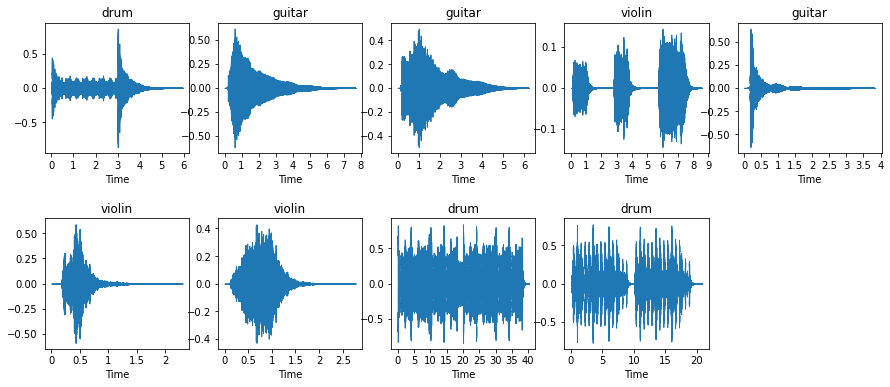

In [12]:
plt.figure(figsize=(15, 6)) # Mengatur ukuran figur plot
for i, x in enumerate(audio_data['y']): # Loop semua data audio
	plt.subplot(2,5,i+1)  #buat subplot masing - masing
	plt.subplots_adjust(hspace=.5) # Mengatur jarak horizontal antar grafik
	plt.title(audio_data['label'][i]) # Menambah label pada judul plot
	librosa.display.waveshow(x)  #cetak waveshow
	plt.ylim(-1,1) # memberi standar rentang grafik pada semua plot

plt.show() # Menampilkan plot

# Extract Low-Level & High-Level Feature

Source : https://librosa.org/doc/latest/generated/librosa.feature.rms.html

In [14]:
# Fungsi Mengekstrak Root Mean Square Energy
def RMSE(y):
    stft = librosa.stft(y)
    magnitude, phase = librosa.magphase(stft)
    rmse = librosa.feature.rms(S=magnitude)
    return rmse

Source : https://www.youtube.com/watch?v=rlypsap6Wow

In [15]:
# Fungsi Mengekstrak Amplitude Envelope
def AE(y, frame_size=1024):
    amplitude_envelope = []

    for i in range(0, len(y), frame_size):
        current_frame_amplitude_envelope = max(y[i:i+frame_size],)
        amplitude_envelope.append(current_frame_amplitude_envelope)
    
    return np.array(amplitude_envelope)

Source : http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.chroma_stft.html

In [16]:
# Fungsi Mengekstrak Chroma
def chroma(y):
    S = np.abs(librosa.stft(y))
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    return chroma

In [17]:
data_extraction = {
    # Low Level Feature
    'ZCR' : [], # Zero Crossing Rate
    'SC' : [], # Spectral Centroid
    'RMSE' : [], # Root Mean Square Energy
    'AE' : [], # Amplitude Envelope
    # High Level Feature
    'Spectogram' : [],
    'Chroma' : [],
    # Label Data
    'label' : []
}

# Looping untuk Mengekstrak Semua Feature kemudian Mengambil Rata-Rata dan Disimpan di dict data_extraction
for i, label in enumerate(audio_data['label']):
    data_extraction['ZCR'].append(np.mean(librosa.feature.zero_crossing_rate(audio_data['y'][i])[0]))
    data_extraction['SC'].append(np.mean(librosa.feature.spectral_centroid(audio_data['y'][i])[0]))
    data_extraction['RMSE'].append(np.mean(RMSE(audio_data['y'][i])))
    data_extraction['AE'].append(np.mean(AE(audio_data['y'][i])))
    data_extraction['Spectogram'].append(np.mean(librosa.feature.melspectrogram(audio_data['y'][i])))
    data_extraction['Chroma'].append(np.mean(chroma(audio_data['y'][i])))
    data_extraction['label'].append(label)

In [19]:
# Hasil Ekstraksi Audio Feature
df_extract = pd.DataFrame.from_dict(data_extraction)
df_extract

,ZCR,SC,RMSE,AE,Spectogram,Chroma,label
0,0.303183,4295.950915,0.020372,0.106194,0.439497,0.797291,drum
1,0.020989,460.501431,0.027657,0.095694,1.287550,0.419018,guitar
2,0.026943,479.283376,0.029195,0.110878,1.122543,0.333432,guitar
3,0.224422,3035.369481,0.007857,0.036961,0.080219,0.474338,violin
4,0.037089,852.669566,0.012522,0.040360,0.781175,0.218767,guitar
5,0.110142,2269.115648,0.018060,0.082352,0.760693,0.243220,violin
6,0.159416,2763.051945,0.021500,0.103199,0.460781,0.342467,violin
7,0.032448,903.038171,0.066610,0.243286,4.195277,0.745620,drum
8,0.058135,1211.921059,0.048599,0.195333,2.069588,0.736650,drum


# Visualisasi Zero Crossing Rate

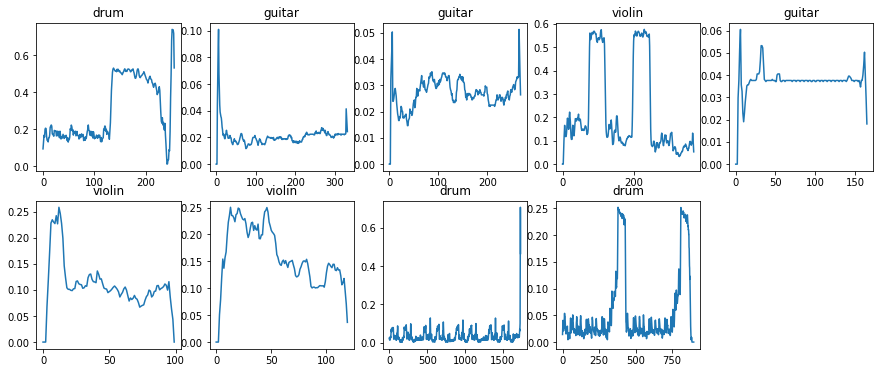

In [15]:
plt.figure(figsize=(15, 6)) 
for i, x in enumerate(audio_data['y']): 
	plt.subplot(2,5,i+1)  
	plt.title(audio_data['label'][i])
	plt.plot(librosa.feature.zero_crossing_rate(x)[0])

plt.show()

# Visualisasi Spectral Centroid

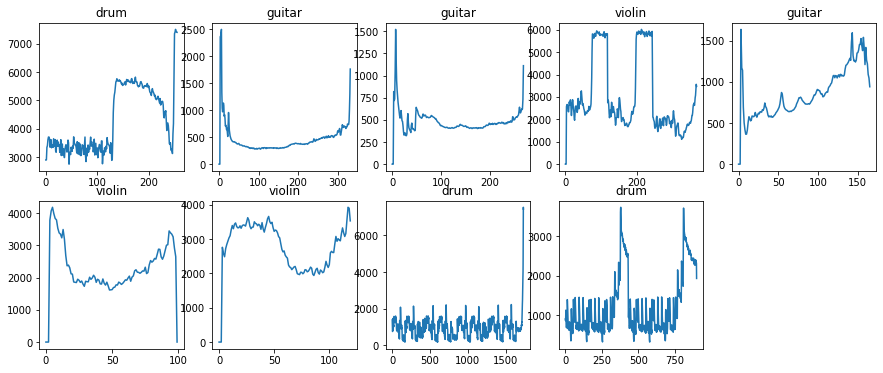

In [16]:
plt.figure(figsize=(15, 6)) 
for i, x in enumerate(audio_data['y']): 
	plt.subplot(2,5,i+1)  
	plt.title(audio_data['label'][i])
	plt.plot(librosa.feature.spectral_centroid(x)[0])

plt.show()

# Visualisasi Root Mean Square Energy

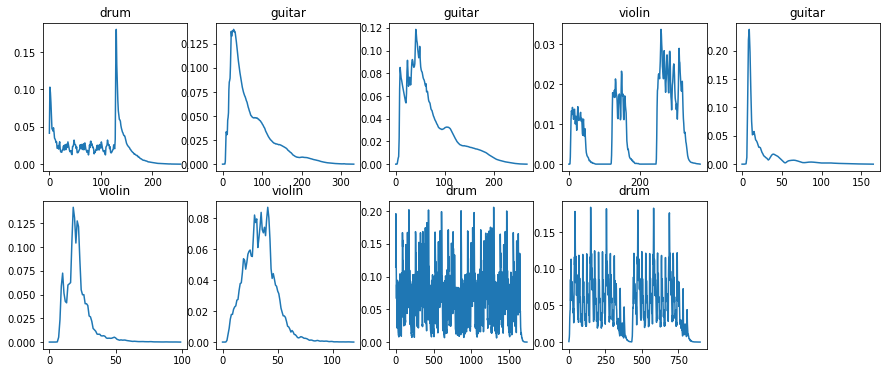

In [17]:
plt.figure(figsize=(15, 6)) 
for i, x in enumerate(audio_data['y']): 
	plt.subplot(2,5,i+1)  
	plt.title(audio_data['label'][i])
	plt.plot(RMSE(x)[0])

plt.show()

# Visualisasi Spectogram

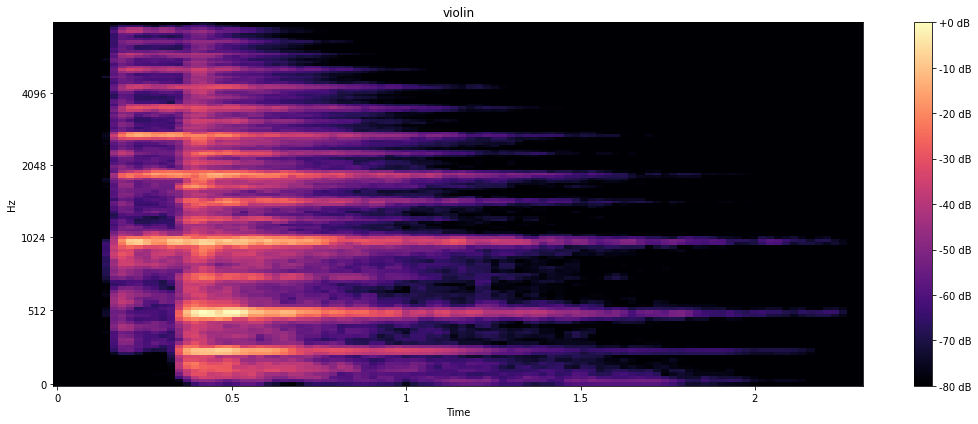

In [18]:
SPECTOGRAM = 5 # Ganti index untuk melihat data lainnya

plt.figure(figsize=(15, 6))
D = np.abs(librosa.stft(audio_data['y'][SPECTOGRAM]))**2
S = librosa.feature.melspectrogram(S=D)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
# plt.subplot(2,5,i+1)
plt.colorbar(format='%+2.0f dB')
plt.title(audio_data['label'][SPECTOGRAM])
plt.tight_layout()

# Visualisasi Chroma

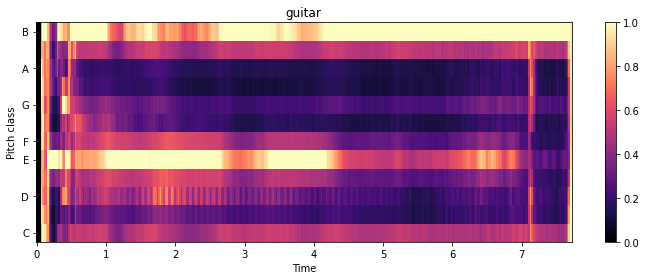

In [19]:
CHROMA = 1 # Ganti index untuk melihat data lainnya

S = np.abs(librosa.stft(audio_data['y'][CHROMA]))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title(audio_data['label'][CHROMA])
plt.tight_layout()
plt.show()

# Perbandingan Low Level Feature

In [20]:
df_extract

,ZCR,SC,RMSE,AE,Spectogram,Chroma,label
0,0.303183,4295.950915,0.020372,0.106194,0.439497,0.797291,drum
1,0.020989,460.501431,0.027657,0.095694,1.287550,0.419018,guitar
2,0.026943,479.283376,0.029195,0.110878,1.122543,0.333432,guitar
3,0.224422,3035.369481,0.007857,0.036961,0.080219,0.474338,violin
4,0.037089,852.669566,0.012522,0.040360,0.781175,0.218767,guitar
5,0.110142,2269.115648,0.018060,0.082352,0.760693,0.243220,violin
6,0.159416,2763.051945,0.021500,0.103199,0.460781,0.342467,violin
7,0.032448,903.038171,0.066610,0.243286,4.195277,0.745620,drum
8,0.058135,1211.921059,0.048599,0.195333,2.069588,0.736650,drum


## Encode Label 

In [21]:
df_extract['label'] = df_extract['label'].astype('category')

In [22]:
df_extract['label'] = df_extract['label'].cat.codes

In [23]:
df_extract

,ZCR,SC,RMSE,AE,Spectogram,Chroma,label
0,0.303183,4295.950915,0.020372,0.106194,0.439497,0.797291,0
1,0.020989,460.501431,0.027657,0.095694,1.287550,0.419018,1
2,0.026943,479.283376,0.029195,0.110878,1.122543,0.333432,1
3,0.224422,3035.369481,0.007857,0.036961,0.080219,0.474338,2
4,0.037089,852.669566,0.012522,0.040360,0.781175,0.218767,1
5,0.110142,2269.115648,0.018060,0.082352,0.760693,0.243220,2
6,0.159416,2763.051945,0.021500,0.103199,0.460781,0.342467,2
7,0.032448,903.038171,0.066610,0.243286,4.195277,0.745620,0
8,0.058135,1211.921059,0.048599,0.195333,2.069588,0.736650,0


0 = Drum, 1 = Guitar, 2 = Violin

# Scalling Data

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_extract.iloc[:, :6]), columns=['ZCR', 'SC', 'RMSE', 'AE', 'Spectogram', 'Chroma'])
df_scaled['label'] = df_extract['label']
df_scaled

,ZCR,SC,RMSE,AE,Spectogram,Chroma,label
0,1.000000,1.000000,0.213004,0.335552,0.087308,1.000000,0
1,0.000000,0.000000,0.336994,0.284660,0.293393,0.346140,1
2,0.021098,0.004897,0.363167,0.358254,0.253295,0.198202,1
3,0.720899,0.671334,0.000000,0.000000,0.000000,0.441765,2
4,0.057053,0.102248,0.079401,0.016473,0.170339,0.000000,1
5,0.315928,0.471552,0.173661,0.219999,0.165362,0.042269,2
6,0.490538,0.600334,0.232205,0.321037,0.092480,0.213819,2
7,0.040608,0.115381,1.000000,1.000000,1.000000,0.910685,0
8,0.131635,0.195914,0.693438,0.767587,0.483436,0.895181,0


# Plot Berdasarkan SC dan ZCR

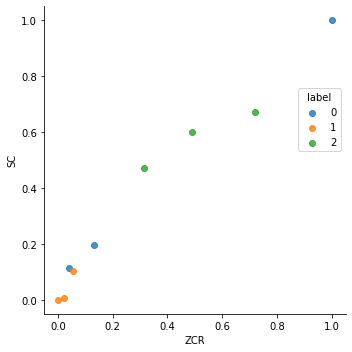

In [48]:
facet = sns.lmplot(data=df_scaled, x='ZCR', y='SC', hue='label', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

Menurut Zero Crossing Rate dan Spectral Centroid:
- Violin memiliki karakteristik yang mengelompok sendiri
- Drum dan Gitar memiliki karakteristik untuk berkelompok, namun ada satu data drum yang menjadi outlier

# Plot Berdasarkan RMSE dan ZCR

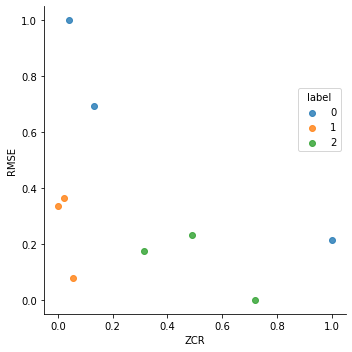

In [49]:
facet = sns.lmplot(data=df_scaled, x='ZCR', y='RMSE', hue='label', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

Menurut Root Mean Square Energy dan Zero Crossing Rate:
- Gitar memiliki karakteristik untuk berkelompok sendiri
- Violin memiliki karakteristik untuk berkelompok sendiri
- 2 data drum berkelompok sendiri dan satu data menjadi outlier, namun masih bisa dikelompokkan dengan menarik garis linier
- Ketiga label dapat dikelompokkan dengan garis linier

# Plot Berdasarkan SC dan RMSE

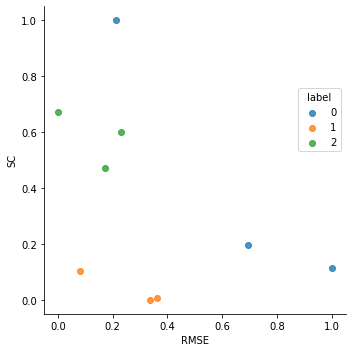

In [50]:
facet = sns.lmplot(data=df_scaled, x='RMSE', y='SC', hue='label', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

Menurut Root Mean Square Energy dan Spectral Centroid:
- Gitar memiliki karakteristik untuk berkelompok sendiri
- Violin memiliki karakteristik untuk berkelompok sendiri
- 2 data drum berkelompok sendiri dan satu data menjadi outlier, namun masih bisa dikelompokkan dengan menarik garis linier
- Ketiga label dapat dikelompokkan dengan garis linier